<a href="https://colab.research.google.com/github/zzeiadahmed/Data-Science-Projects/blob/main/Copy_of_Automate_API_Extraction_%2B_Appending_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import smtplib
import time
import datetime

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12238,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.988880e+07,1.988880e+07,False,NaN,1,NaN,NaN,None,2025-07-07T08:40:00.000Z,109003.279478,3.984272e+10,32.6450,0.030860,0.888462,1.319206,3.893770,9.430168,37.744969,2.167944e+12,64.4354,2.289069e+12,None,2025-07-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 08:41:46.766415
1,1027,Ethereum,ETH,ethereum,10369,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207169e+08,1.207169e+08,True,NaN,2,NaN,NaN,None,2025-07-07T08:40:00.000Z,2579.567065,1.500476e+10,66.2552,0.227137,2.621771,4.313402,3.657598,33.149326,65.120407,3.113973e+11,9.2553,3.113973e+11,None,2025-07-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 08:41:46.766415
2,825,Tether USDt,USDT,tether,135355,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.585817e+11,1.608224e+11,True,NaN,3,NaN,NaN,None,2025-07-07T08:40:00.000Z,1.000243,5.485944e+10,52.2080,0.017305,0.002688,0.007322,-0.030081,0.010312,0.062904,1.586202e+11,4.7145,1.608615e+11,None,2025-07-07T08:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-07 08:41:46.766415
3,52,XRP,XRP,xrp,1640,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.906819e+10,9.998597e+10,False,NaN,4,NaN,NaN,None,2025-07-07T08:40:00.000Z,2.271315,2.715293e+09,124.5320,0.103433,1.434869,4.114950,4.131065,2.994213,21.911933,1.341625e+11,3.9876,2.271315e+11,None,2025-07-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 08:41:46.766415
4,1839,BNB,BNB,bnb,2603,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408851e+08,1.408851e+08,False,NaN,5,NaN,NaN,None,2025-07-07T08:40:00.000Z,662.614915,1.464026e+09,24.3473,0.008675,1.235945,1.404830,2.217543,7.538602,19.055431,9.335259e+10,2.7746,9.335259e+10,None,2025-07-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 08:41:46.766415
5,5426,Solana,SOL,solana,944,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.355771e+08,6.047419e+08,True,NaN,6,5.252369e+08,8.023889e+10,None,2025-07-07T08:40:00.000Z,152.767053,3.225000e+09,111.4138,0.603908,3.612350,2.061442,0.254895,-0.038725,41.906167,8.181853e+10,2.4318,9.238464e+10,None,2025-07-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 08:41:46.766415
6,3408,USDC,USDC,usd-coin,29104,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.208051e+10,6.208051e+10,False,NaN,7,6.090122e+10,6.089849e+10,None,2025-07-07T08:40:00.000Z,0.999955,6.249058e+09,85.7468,0.006064,0.011840,0.008481,0.013244,-0.005553,-0.001082,6.207773e+10,1.8451,6.207773e+10,None,2025-07-07T08:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-07 08:41:46.766415
7,1958,TRON,TRX,tron,1194,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.478158e+10,9.478159e+10,True,NaN,8,7.165966e+10,2.053368e+10,None,2025-07-07T08:40:00.000Z,0.286545,3.111294e+08,19.4224,-0.294056,0.812423,3.190243,2.717013,14.039443,22.400610,2.715914e+10,0.8072,2.715915e+10,None,2025-07-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 08:41:46.766415
8,74,Dogecoin,DOGE,dogecoin,1247,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-ex

# New Section

In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
   api_runner
   print('api completed succsefully')
   sleep(60)
exit()

api completed succsefully


KeyboardInterrupt: 

In [ ]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12238,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.988880e+07,1.988880e+07,False,NaN,1,NaN,NaN,None,2025-07-07T08:40:00.000Z,109003.279478,3.984272e+10,32.6450,0.030860,0.888462,1.319206,3.893770,9.430168,37.744969,2.167944e+12,64.4354,2.289069e+12,None,2025-07-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 08:41:46.766415
1,1027,Ethereum,ETH,ethereum,10369,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207169e+08,1.207169e+08,True,NaN,2,NaN,NaN,None,2025-07-07T08:40:00.000Z,2579.567065,1.500476e+10,66.2552,0.227137,2.621771,4.313402,3.657598,33.149326,65.120407,3.113973e+11,9.2553,3.113973e+11,None,2025-07-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 08:41:46.766415
2,825,Tether USDt,USDT,tether,135355,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.585817e+11,1.608224e+11,True,NaN,3,NaN,NaN,None,2025-07-07T08:40:00.000Z,1.000243,5.485944e+10,52.2080,0.017305,0.002688,0.007322,-0.030081,0.010312,0.062904,1.586202e+11,4.7145,1.608615e+11,None,2025-07-07T08:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-07 08:41:46.766415
3,52,XRP,XRP,xrp,1640,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.906819e+10,9.998597e+10,False,NaN,4,NaN,NaN,None,2025-07-07T08:40:00.000Z,2.271315,2.715293e+09,124.5320,0.103433,1.434869,4.114950,4.131065,2.994213,21.911933,1.341625e+11,3.9876,2.271315e+11,None,2025-07-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 08:41:46.766415
4,1839,BNB,BNB,bnb,2603,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.408851e+08,1.408851e+08,False,NaN,5,NaN,NaN,None,2025-07-07T08:40:00.000Z,662.614915,1.464026e+09,24.3473,0.008675,1.235945,1.404830,2.217543,7.538602,19.055431,9.335259e+10,2.7746,9.335259e+10,None,2025-07-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 08:41:46.766415
5,5426,Solana,SOL,solana,944,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.355771e+08,6.047419e+08,True,NaN,6,5.252369e+08,8.023889e+10,None,2025-07-07T08:40:00.000Z,152.767053,3.225000e+09,111.4138,0.603908,3.612350,2.061442,0.254895,-0.038725,41.906167,8.181853e+10,2.4318,9.238464e+10,None,2025-07-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 08:41:46.766415
6,3408,USDC,USDC,usd-coin,29104,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.208051e+10,6.208051e+10,False,NaN,7,6.090122e+10,6.089849e+10,None,2025-07-07T08:40:00.000Z,0.999955,6.249058e+09,85.7468,0.006064,0.011840,0.008481,0.013244,-0.005553,-0.001082,6.207773e+10,1.8451,6.207773e+10,None,2025-07-07T08:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-07 08:41:46.766415
7,1958,TRON,TRX,tron,1194,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.478158e+10,9.478159e+10,True,NaN,8,7.165966e+10,2.053368e+10,None,2025-07-07T08:40:00.000Z,0.286545,3.111294e+08,19.4224,-0.294056,0.812423,3.190243,2.717013,14.039443,22.400610,2.715914e+10,0.8072,2.715915e+10,None,2025-07-07T08:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-07 08:41:46.766415
8,74,Dogecoin,DOGE,dogecoin,1247,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-ex

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df3 = df.groupby('name',sort = False ) [['quote.USD.percent_change_1h' , 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,0.03086,1.31921,3.89377,9.43017,37.74497
Ethereum,0.22714,4.31340,3.65760,33.14933,65.12041
Tether USDt,0.01730,0.00732,-0.03008,0.01031,0.06290
XRP,0.10343,4.11495,4.13107,2.99421,21.91193
BNB,0.00867,1.40483,2.21754,7.53860,19.05543
Solana,0.60391,2.06144,0.25490,-0.03873,41.90617
USDC,0.00606,0.00848,0.01324,-0.00555,-0.00108
TRON,-0.29406,3.19024,2.71701,14.03944,22.40061
Dogecoin,-0.27438,4.24389,-6.67632,-5.41775,14.48580


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.03086
              quote.USD.percent_change_7d      1.31921
              quote.USD.percent_change_30d     3.89377
              quote.USD.percent_change_60d     9.43017
              quote.USD.percent_change_90d    37.74497
Ethereum      quote.USD.percent_change_1h      0.22714
              quote.USD.percent_change_7d      4.31340
              quote.USD.percent_change_30d     3.65760
              quote.USD.percent_change_60d    33.14933
              quote.USD.percent_change_90d    65.12041
Tether USDt   quote.USD.percent_change_1h      0.01730
              quote.USD.percent_change_7d      0.00732
              quote.USD.percent_change_30d    -0.03008
              quote.USD.percent_change_60d     0.01031
              quote.USD.percent_change_90d     0.06290
XRP           quote.USD.percent_change_1h      0.10343
              quote.USD.percent_change_7d      4.11495
              quote.USD.percent_change_30d     4.13107
              quote.USD.percent_change_60d     2.99421
              quote.USD.percent_change_90d    21.91193
BNB           quote.USD.percent_change_1h      0.00867
              quote.USD.percent_change_7d      1.40483
              quote.USD.percent_change_30d     2.21754
              quote.USD.percent_change_60d     7.53860
              quote.USD.percent_change_90d    19.05543
Solana        quote.USD.percent_change_1h      0.60391
              quote.USD.percent_change_7d      2.06144
              quote.USD.percent_change_30d     0.25490
              quote.USD.percent_change_60d    -0.03873
              quote.USD.percent_change_90d    41.90617
USDC          quote.USD.percent_change_1h      0.00606
              quote.USD.percent_change_7d      0.00848
              quote.USD.percent_change_30d     0.01324
              quote.USD.percent_change_60d    -0.00555
              quote.USD.percent_change_90d    -0.00108
TRON          quote.USD.percent_change_1h     -0.29406
              quote.USD.percent_change_7d      3.19024
              quote.USD.percent_change_30d     2.71701
              quote.USD.percent_change_60d    14.03944
              quote.USD.percent_change_90d    22.40061
Dogecoin      quote.USD.percent_change_1h     -0.27438
              quote.USD.percent_change_7d      4.24389
              quote.USD.percent_change_30d    -6.67632
              quote.USD.percent_change_60d    -5.41775
              quote.USD.percent_change_90d    14.48580
Cardano       quote.USD.percent_change_1h      0.49076
              quote.USD.percent_change_7d      3.85062
              quote.USD.percent_change_30d   -11.58201
              quote.USD.percent_change_60d   -17.43920
              quote.USD.percent_change_90d     1.56130
Hyperliquid   quote.USD.percent_change_1h      0.38027
              quote.USD.percent_change_7d      0.75504
              quote.USD.percent_change_30d    18.23895
              quote.USD.percent_change_60d    82.67427
              quote.USD.percent_change_90d   237.65980
Sui           quote.USD.percent_change_1h     -0.04351
              quote.USD.percent_change_7d      4.57444
              quote.USD.percent_change_30d   -11.07004
              quote.USD.percent_change_60d   -20.46265
              quote.USD.percent_change_90d    44.43842
Bitcoin Cash  quote.USD.percent_change_1h     -0.27937
              quote.USD.percent_change_7d     -0.44553
              quote.USD.percent_change_30d    22.18998
              quote.USD.percent_change_60d    18.05721
              quote.USD.percent_change_90d    77.31811
Chainlink     quote.USD.percent_change_1h      0.03736
              quote.USD.percent_change_7d      2.68876
              quote.USD.percent_change_30d    -2.45395
              quote.USD.percent_change_60d    -7.51574
              quote.USD.percent_change_90d    18.20099
UNUS SED LEO  quote.USD.percent_change_1h     -0.02793
              quote.USD.percent_change_7d     -1.100

In [ ]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.03086
             quote.USD.percent_change_7d    1.31921
             quote.USD.percent_change_30d   3.89377
             quote.USD.percent_change_60d   9.43017
             quote.USD.percent_change_90d  37.74497
Ethereum     quote.USD.percent_change_1h    0.22714
             quote.USD.percent_change_7d    4.31340
             quote.USD.percent_change_30d   3.65760
             quote.USD.percent_change_60d  33.14933
             quote.USD.percent_change_90d  65.12041
Tether USDt  quote.USD.percent_change_1h    0.01730
             quote.USD.percent_change_7d    0.00732
             quote.USD.percent_change_30d  -0.03008
             quote.USD.percent_change_60d   0.01031
             quote.USD.percent_change_90d   0.06290
XRP          quote.USD.percent_change_1h    0.10343
             quote.USD.percent_change_7d    4.11495
             quote.USD.percent_change_30d   4.13107
             quote.USD.percent_change_60d   2.99421
             quote.USD.percent_change_90d  21.91193
BNB          quote.USD.percent_change_1h    0.00867
             quote.USD.percent_change_7d    1.40483
             quote.USD.percent_change_30d   2.21754
             quote.USD.percent_change_60d   7.53860
             quote.USD.percent_change_90d  19.05543
Solana       quote.USD.percent_change_1h    0.60391
             quote.USD.percent_change_7d    2.06144
             quote.USD.percent_change_30d   0.25490
             quote.USD.percent_change_60d  -0.03873
             quote.USD.percent_change_90d  41.90617
USDC         quote.USD.percent_change_1h    0.00606
             quote.USD.percent_change_7d    0.00848
             quote.USD.percent_change_30d   0.01324
             quote.USD.percent_change_60d  -0.00555
             quote.USD.percent_change_90d  -0.00108
TRON         quote.USD.percent_change_1h   -0.29406
             quote.USD.percent_change_7d    3.19024
             quote.USD.percent_change_30d   2.71701
             quote.USD.percent_change_60d  14.03944
             quote.USD.percent_change_90d  22.40061
Dogecoin     quote.USD.percent_change_1h   -0.27438
             quote.USD.percent_change_7d    4.24389
             quote.USD.percent_change_30d  -6.67632
             quote.USD.percent_change_60d  -5.41775
             quote.USD.percent_change_90d  14.48580
Cardano      quote.USD.percent_change_1h    0.49076
             quote.USD.percent_change_7d    3.85062
             quote.USD.percent_change_30d -11.58201
             quote.USD.percent_change_60d -17.43920
             quote.USD.percent_change_90d   1.56130
Hyperliquid  quote.USD.percent_change_1h    0.38027
             quote.USD.percent_change_7d    0.75504
             quote.USD.percent_change_30d  18.23895
             quote.USD.percent_change_60d  82.67427
             quote.USD.percent_change_90d 237.65980
Sui          quote.USD.percent_change_1h   -0.04351
             quote.USD.percent_change_7d    4.57444
             quote.USD.percent_change_30d -11.07004
             quote.USD.percent_change_60d -20.46265
             quote.USD.percent_change_90d  44.43842
Bitcoin Cash quote.USD.percent_change_1h   -0.27937
             quote.USD.percent_change_7d   -0.44553
             quote.USD.percent_change_30d  22.18998
             quote.USD.percent_change_60d  18.05721
             quote.USD.percent_change_90d  77.31811
Chainlink    quote.USD.percent_change_1h    0.03736
             quote.USD.percent_change_7d    2.68876
             quote.USD.percent_change_30d  -2.45395
             quote.USD.percent_change_60d  -7.51574
             quote.USD.percent_change_90d  18.20099
UNUS SED LEO quote.USD.percent_change_1h   -0.02793
             quote.USD.percent_change_7d   -1.10094
             quote.USD.percent_change_30d  -0.33218
             quote.USD.percent_change_60d   3.25052
             quote.USD.percent_change_90d   0.91109

In [ ]:

df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.03086
             quote.USD.percent_change_7d    1.31921
             quote.USD.percent_change_30d   3.89377
             quote.USD.percent_change_60d   9.43017
             quote.USD.percent_change_90d  37.74497
Ethereum     quote.USD.percent_change_1h    0.22714
             quote.USD.percent_change_7d    4.31340
             quote.USD.percent_change_30d   3.65760
             quote.USD.percent_change_60d  33.14933
             quote.USD.percent_change_90d  65.12041
Tether USDt  quote.USD.percent_change_1h    0.01730
             quote.USD.percent_change_7d    0.00732
             quote.USD.percent_change_30d  -0.03008
             quote.USD.percent_change_60d   0.01031
             quote.USD.percent_change_90d   0.06290
XRP          quote.USD.percent_change_1h    0.10343
             quote.USD.percent_change_7d    4.11495
             quote.USD.percent_change_30d   4.13107
             quote.USD.percent_change_60d   2.99421
             quote.USD.percent_change_90d  21.91193
BNB          quote.USD.percent_change_1h    0.00867
             quote.USD.percent_change_7d    1.40483
             quote.USD.percent_change_30d   2.21754
             quote.USD.percent_change_60d   7.53860
             quote.USD.percent_change_90d  19.05543
Solana       quote.USD.percent_change_1h    0.60391
             quote.USD.percent_change_7d    2.06144
             quote.USD.percent_change_30d   0.25490
             quote.USD.percent_change_60d  -0.03873
             quote.USD.percent_change_90d  41.90617
USDC         quote.USD.percent_change_1h    0.00606
             quote.USD.percent_change_7d    0.00848
             quote.USD.percent_change_30d   0.01324
             quote.USD.percent_change_60d  -0.00555
             quote.USD.percent_change_90d  -0.00108
TRON         quote.USD.percent_change_1h   -0.29406
             quote.USD.percent_change_7d    3.19024
             quote.USD.percent_change_30d   2.71701
             quote.USD.percent_change_60d  14.03944
             quote.USD.percent_change_90d  22.40061
Dogecoin     quote.USD.percent_change_1h   -0.27438
             quote.USD.percent_change_7d    4.24389
             quote.USD.percent_change_30d  -6.67632
             quote.USD.percent_change_60d  -5.41775
             quote.USD.percent_change_90d  14.48580
Cardano      quote.USD.percent_change_1h    0.49076
             quote.USD.percent_change_7d    3.85062
             quote.USD.percent_change_30d -11.58201
             quote.USD.percent_change_60d -17.43920
             quote.USD.percent_change_90d   1.56130
Hyperliquid  quote.USD.percent_change_1h    0.38027
             quote.USD.percent_change_7d    0.75504
             quote.USD.percent_change_30d  18.23895
             quote.USD.percent_change_60d  82.67427
             quote.USD.percent_change_90d 237.65980
Sui          quote.USD.percent_change_1h   -0.04351
             quote.USD.percent_change_7d    4.57444
             quote.USD.percent_change_30d -11.07004
             quote.USD.percent_change_60d -20.46265
             quote.USD.percent_change_90d  44.43842
Bitcoin Cash quote.USD.percent_change_1h   -0.27937
             quote.USD.percent_change_7d   -0.44553
             quote.USD.percent_change_30d  22.18998
             quote.USD.percent_change_60d  18.05721
             quote.USD.percent_change_90d  77.31811
Chainlink    quote.USD.percent_change_1h    0.03736
             quote.USD.percent_change_7d    2.68876
             quote.USD.percent_change_30d  -2.45395
             quote.USD.percent_change_60d  -7.51574
             quote.USD.percent_change_90d  18.20099
UNUS SED LEO quote.USD.percent_change_1h   -0.02793
             quote.USD.percent_change_7d   -1.10094
             quote.USD.percent_change_30d  -0.33218
             quote.USD.percent_change_60d   3.25052
             quote.USD.percent_change_90d   0.91109

In [ ]:

index = pd.Index(range(75))


# Set the above DataFrame index object as the index
# using set_index() function

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.03086
1,Bitcoin,quote.USD.percent_change_7d,1.31921
2,Bitcoin,quote.USD.percent_change_30d,3.89377
3,Bitcoin,quote.USD.percent_change_60d,9.43017
4,Bitcoin,quote.USD.percent_change_90d,37.74497
5,Ethereum,quote.USD.percent_change_1h,0.22714
6,Ethereum,quote.USD.percent_change_7d,4.31340
7,Ethereum,quote.USD.percent_change_30d,3.65760
8,Ethereum,quote.USD.percent_change_60d,33.14933
9,Ethereum,quote.USD.percent_change_90d,65.12041


In [ ]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.03086
1,Bitcoin,quote.USD.percent_change_7d,1.31921
2,Bitcoin,quote.USD.percent_change_30d,3.89377
3,Bitcoin,quote.USD.percent_change_60d,9.43017
4,Bitcoin,quote.USD.percent_change_90d,37.74497
5,Ethereum,quote.USD.percent_change_1h,0.22714
6,Ethereum,quote.USD.percent_change_7d,4.31340
7,Ethereum,quote.USD.percent_change_30d,3.65760
8,Ethereum,quote.USD.percent_change_60d,33.14933
9,Ethereum,quote.USD.percent_change_90d,65.12041


In [ ]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.03086
1,Bitcoin,7d,1.31921
2,Bitcoin,30d,3.89377
3,Bitcoin,60d,9.43017
4,Bitcoin,90d,37.74497
5,Ethereum,quote.USD.percent_change_1h,0.22714
6,Ethereum,7d,4.31340
7,Ethereum,30d,3.65760
8,Ethereum,60d,33.14933
9,Ethereum,90d,65.12041


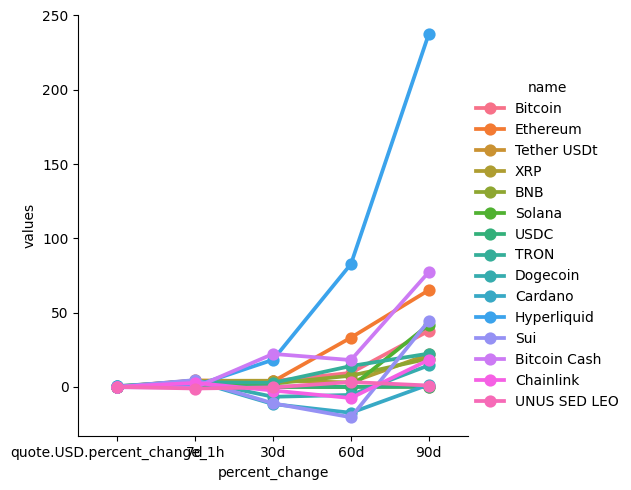

In [ ]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')